# Project Data_Science 
Handwrriten Arabic Character Recognation Using Deep Learning

# Importing laibraries 📚

In [2]:
#laibraries for read_data  
import numpy as np
import pandas as pd

# Virsualization for data 
import matplotlib.pyplot as plt

# import Callbacks for EarlySttoping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# important laibary for bulding Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical

# Data Augmentation (THis is bonus :)  )
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read Data From Kaggle 📝

In [3]:
#SPlit our data into 4 parts (x_train,x_test,y_train,y_test)
X_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv').to_numpy()
X_test=pd.read_csv('/kaggle/input/ahcd1/csvTestImages 3360x1024.csv').to_numpy()
y_train=pd.read_csv('/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv').to_numpy()-1
y_test=pd.read_csv('/kaggle/input/ahcd1/csvTestLabel 3360x1.csv').to_numpy()-1

# Data Exploration 🔎 

In [4]:
# printing the Shape of data to show no rows,columns 
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 1024)
X_test shape is  (3359, 1024)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [56]:
# We Need to do Reshape our Data 
X_train = X_train.reshape(-1,32,32,1)
X_test = X_test.reshape(-1,32,32,1)

In [6]:
# printing the Shape of data to show no rows,columns after Reshape
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)
y_train shape is  (13439, 1)
y_test shape is  (3359, 1)


In [8]:
#Transform y_train,y_test into Categorical data 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

y_train shape is  (13439, 28)
y_test shape is  (3359, 28)


Grayscale conversion
Normalisation
Data Augmentation
Image standardization

# Data Augmentation (preprocessing in IMage)

In [111]:
# Data Augmentation
# zoom_range  will randomly zoom the image and adds new pixels for the image
# Rescale = Normalization 
#rescale=1/255 will convert the pixels in range [0,255] to range [0,1] to calculate loss

gen=ImageDataGenerator(zoom_range=0.3 ,rescale=1.0/255.0,horizontal_flip=True)
train_data=gen.flow(X_train, y_train,)

# Model :)

In [12]:
#Initializing CNN & add a convolutional layer
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),  
#Pooling operation and ,the Pooling layer reduces the number of parameters
    MaxPooling2D(2,2),
#(Padding = Same) which depicts that output images have the same dimensions as input images    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
#converting the dataset into a 1-D array
    Flatten(),
 # Fully connected layer & output layer to classify image
  
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(28, activation='softmax')
])


2022-12-18 18:53:42.529813: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Callbacks

In [13]:
reduce=ReduceLROnPlateau(factor=0.03,min_lr=0.000001)

In [14]:
callbacks=[reduce]

In [15]:
# Compile Model 

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# loss =categorical for classification task
# opimizer= adam used to update (neural network weights) and (learning rate)
# metrics= accuracy to show performance of the Convolutional neural network algorithm

In [16]:
# This show no of Parameters 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          7

# Fiting

In [17]:
model.fit(train_data,epochs=30,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/30


2022-12-18 18:53:42.859581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


420/420 [==============================] - 21s 48ms/step - loss: 1.5860 - accuracy: 0.4820 - val_loss: 84.8468 - val_accuracy: 0.7595
Epoch 2/30
420/420 [==============================] - 18s 42ms/step - loss: 0.7037 - accuracy: 0.7548 - val_loss: 61.7651 - val_accuracy: 0.8500
Epoch 3/30
420/420 [==============================] - 19s 45ms/step - loss: 0.4869 - accuracy: 0.8331 - val_loss: 65.0803 - val_accuracy: 0.8690
Epoch 4/30
420/420 [==============================] - 19s 45ms/step - loss: 0.3795 - accuracy: 0.8678 - val_loss: 66.9767 - val_accuracy: 0.8818
Epoch 5/30
420/420 [==============================] - 18s 42ms/step - loss: 0.3137 - accuracy: 0.8937 - val_loss: 50.7066 - val_accuracy: 0.9068
Epoch 6/30
420/420 [==============================] - 19s 45ms/step - loss: 0.2686 - accuracy: 0.9118 - val_loss: 54.9465 - val_accuracy: 0.9044
Epoch 7/30
420/420 [==============================] - 18s 44ms/step - loss: 0.2475 - accuracy: 0.9193 - val_loss: 45.4250 - val_accuracy: 0.9

# Accuracy

In [18]:
losses=pd.DataFrame(model.history.history)

In [19]:
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,1.585999,0.481955,84.846832,0.759452,0.00100
1,0.703714,0.754818,61.765099,0.849955,0.00100
2,0.486872,0.833098,65.080338,0.869009,0.00100
3,0.379508,0.867773,66.976677,0.881810,0.00100
4,0.313719,0.893742,50.706585,0.906817,0.00100
5,0.268639,0.911824,54.946537,0.904436,0.00100
6,0.247549,0.919339,45.425041,0.917237,0.00100
7,0.206076,0.930054,43.949512,0.926466,0.00100
8,0.192436,0.936082,43.206348,0.935993,0.00100
9,0.180751,0.940323,61.175728,0.912176,0.00100


<AxesSubplot:>

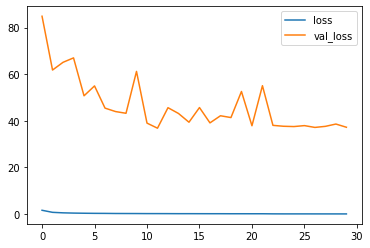

In [20]:
losses[['loss','val_loss']].plot()

accuracy and loss function 

<AxesSubplot:>

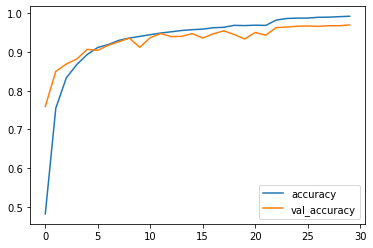

In [21]:
losses[['accuracy','val_accuracy']].plot()

In [22]:
model.evaluate(X_test,y_test)

105/105 [==============================] - 2s 20ms/step - loss: 37.2112 - accuracy: 0.9699


[37.21116638183594, 0.9699315428733826]

In [23]:
predict=model.predict(X_test)

# **Predicting**

In [33]:
# 550 Means the picture number in test_data
x=np.argmax(predict[500])  
if(x==0):
    print("الف")
elif(x==1):
    print("باء")
elif(x==2):
    print("تاء")
elif(x==3):
    print("ثاء")
elif(x==4):
    print("جيم") 
elif(x==5):
    print("حاء")
elif(x==6):
    print("خاء")
elif(x==7):
    print("دال")
elif(x==8):
    print("ذال")
elif(x==9):
    print("الف")
elif(x==10):
    print("راء")
elif(x==11):
    print("الف")
elif(x==12):
    print("الف")
elif(x==13):
    print("شين")
elif(x==14):
    print("الف")
elif(x==15):
    print("الف")
elif(x==16):
    print("الف")
elif(x==17):
    print("الف")
elif(x==18):
    print("الف")
elif(x==19):
    print("الف")
elif(x==20):
    print("الف")
elif(x==21):
    print("الف")
elif(x==22):
    print("الف")
elif(x==23):
    print("الف")
elif(x==24):
    print("الف") 
elif(x==25):
    print("الف")
elif(x==26):
    print("الف")
elif(x==27):
    print("الف")
elif(x==28):
    print("الف")    
else :
    print("لا اعلم ما هذ الحرف!")
#and the output Means this is the label of this charater(الف,باء,تاء.......)

الف


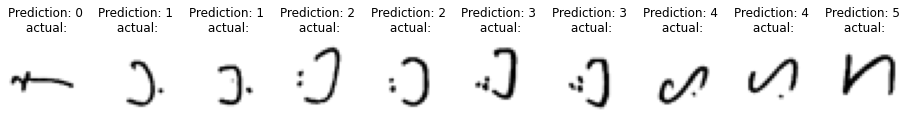

In [105]:
pred=model.predict(X_test)
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,X_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n actual:')

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[1],predict[1])


array([[27,  0],
       [ 0,  1]])

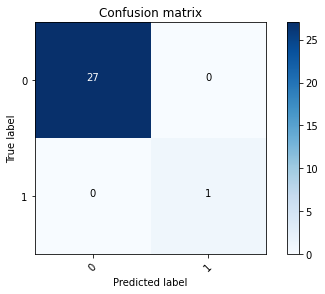

In [52]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test[0],predict[0])
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

# THANKS :)